# DataJam v.2 
By: Minchan Kim

Updates since v.1: 
* imported geopandas, shapely.geometry, matplotlib
* uploaded California geospatial map that breaks down the state into administrative regions
* made each bluebird datapoint into a location that is useable by geopandas with set_crs
* spatial joined the updated bluebird data set and California .shp file
* created a basic choropleth from the spatial join using geopandas libraries
* created pie and bar charts showing distribution of bluebird sightings in different counties

## Import Statements:

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.pyplot as plt

## Creating geospatial data using bluebird csv file:

In [2]:
bluebirds = pd.read_csv("files/bluebird0209.csv")
bluebirds = bluebirds[bluebirds.get('Format') == 'Photo']

In [3]:
columns_with_NaN = bluebirds.columns[bluebirds.isnull().any()]
bluebirds_cleaned = bluebirds.drop(columns = columns_with_NaN)
bluebirds_cleaned = bluebirds_cleaned.drop(columns = ['Format', 'Common Name', 'Scientific Name', 
                                                        'Recordist', 'Playback', 'Parent Species', 'Taxon Category'])

In [4]:
cali_bluebirds = bluebirds_cleaned[bluebirds_cleaned.get('State') == 'California']
cali_bluebirds

,ML Catalog Number,Date,Year,Month,Day,Time,Country,Country-State-County,State,County,Locality,Latitude,Longitude,eBird Checklist ID,eBird Species Code
0,533120441,2023-02-08,2023,2,8,800,United States,US-CA-037,California,Los Angeles,Huntington Botanical Gardens,34.128870,-118.114462,S127903141,wesblu
1,533114851,2023-02-08,2023,2,8,817,United States,US-CA-085,California,Santa Clara,Calero Reservoir,37.187760,-121.776450,S127903016,wesblu
2,533114861,2023-02-08,2023,2,8,817,United States,US-CA-085,California,Santa Clara,Calero Reservoir,37.187760,-121.776450,S127903016,wesblu
3,533105901,2023-02-08,2023,2,8,649,United States,US-CA-059,California,Orange,Creekside Park (Aliso Viejo),33.585523,-117.715040,S127878198,wesblu
4,533035931,2023-02-08,2023,2,8,918,United States,US-CA-085,California,Santa Clara,Penitencia Creek Trail,37.392431,-121.837572,S127886746,wesblu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,402740251,2022-01-05,2022,1,5,1032,United States,US-CA-111,California,Ventura,Lake Casitas Recreation Area,34.413495,-119.339547,S100178681,wesblu
9996,402699271,2022-01-05,2022,1,5,934,United States,US-CA-079,California,San Luis Obispo,Sea Pines Golf Course,35.315359,-120.857441,S100181167,wesblu
9997,402697291,2022-01-05,2022,1,5,934,United States,US-CA-079,California,San Luis Obispo,Sea Pines Golf Course,35.315359,-120.857441,S100181167,wesblu
9998,402628261,2021-12-30,2021,12,30,1002,United States,US-CA-081,California,San Mateo,Pillar Point--Bluffs,37.508645,-122.503341,S99700798,wesblu


In [5]:
bluebird_points = cali_bluebirds.apply(lambda row: Point(row.Longitude, row.Latitude), axis = 1)
bluebird_points

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


0        POINT (-118.114462 34.1288701)
1           POINT (-121.77645 37.18776)
2           POINT (-121.77645 37.18776)
3       POINT (-117.7150404 33.5855228)
4       POINT (-121.8375721 37.3924312)
                     ...               
9995    POINT (-119.3395472 34.4134951)
9996    POINT (-120.8574414 35.3153586)
9997    POINT (-120.8574414 35.3153586)
9998     POINT (-122.5033414 37.508645)
9999    POINT (-121.7845631 36.9041954)
Length: 9950, dtype: object

In [6]:
cali_bluebird_points = gpd.GeoDataFrame(cali_bluebirds, geometry = bluebird_points)
#makes geometry into latitude and longitude.
cali_bluebird_points = cali_bluebird_points.set_crs(epsg=4269)
cali_bluebird_points.head()

,ML Catalog Number,Date,Year,Month,Day,Time,Country,Country-State-County,State,County,Locality,Latitude,Longitude,eBird Checklist ID,eBird Species Code,geometry
0,533120441,2023-02-08,2023,2,8,800,United States,US-CA-037,California,Los Angeles,Huntington Botanical Gardens,34.128870,-118.114462,S127903141,wesblu,POINT (-118.11446 34.12887)
1,533114851,2023-02-08,2023,2,8,817,United States,US-CA-085,California,Santa Clara,Calero Reservoir,37.187760,-121.776450,S127903016,wesblu,POINT (-121.77645 37.18776)
2,533114861,2023-02-08,2023,2,8,817,United States,US-CA-085,California,Santa Clara,Calero Reservoir,37.187760,-121.776450,S127903016,wesblu,POINT (-121.77645 37.18776)
3,533105901,2023-02-08,2023,2,8,649,United States,US-CA-059,California,Orange,Creekside Park (Aliso Viejo),33.585523,-117.715040,S127878198,wesblu,POINT (-117.71504 33.58552)
4,533035931,2023-02-08,2023,2,8,918,United States,US-CA-085,California,Santa Clara,Penitencia Creek Trail,37.392431,-121.837572,S127886746,wesblu,POINT (-121.83757 37.39243)


(-124.61999381, -114.95549479, 32.08653781, 42.36760179)

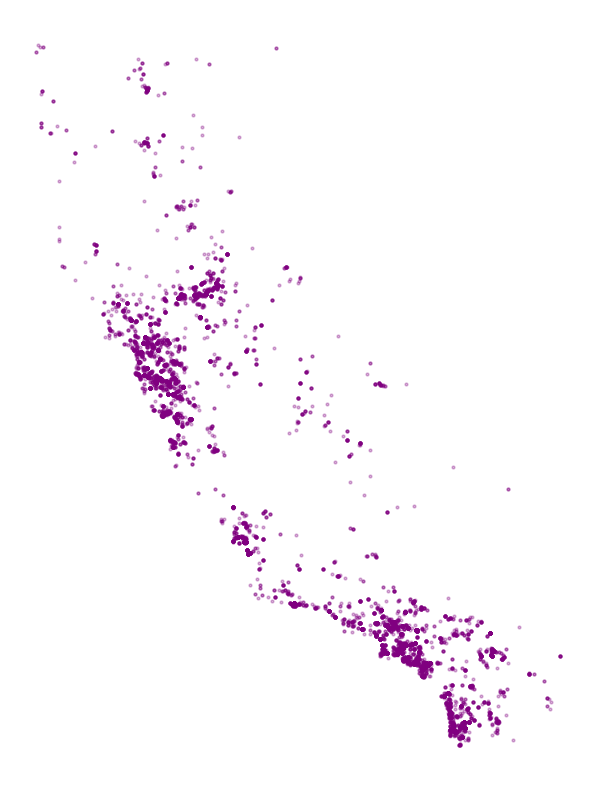

In [7]:
cali_bluebird_points.plot(figsize = (10, 10), color = 'purple', markersize = 4, alpha = .3).axis('off')

In [8]:
cali_shape = gpd.read_file("files/cali/tl_2019_06_cousub.shp")
cali_shape

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,None,None,None,S,437896246,30572097,+37.8911457,-120.4661538,"POLYGON ((-120.65327 37.83205, -120.65324 37.8..."
1,06,109,93470,01935352,0610993470,Twain Harte-Tuolumne City,Twain Harte-Tuolumne City CCD,22,Z5,G4040,None,None,None,S,4691063878,66568242,+38.0406457,-119.8372726,"POLYGON ((-120.50044 38.00665, -120.50032 38.0..."
2,06,077,90900,01935094,0607790900,Escalon,Escalon CCD,22,Z5,G4040,None,None,None,S,249249223,1708049,+37.8263541,-121.0207159,"POLYGON ((-121.14725 37.90501, -121.14656 37.9..."
3,06,077,91690,01935174,0607791690,Lockeford,Lockeford CCD,22,Z5,G4040,None,None,None,S,487542715,10053409,+38.1601025,-121.0870549,"POLYGON ((-121.21532 38.13784, -121.21074 38.1..."
4,06,077,91700,01935175,0607791700,Lodi,Lodi CCD,22,Z5,G4040,None,None,None,S,326663642,3218274,+38.1500242,-121.2907480,"POLYGON ((-121.41099 38.23198, -121.41092 38.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,06,097,93070,01935312,0609793070,Sonoma,Sonoma CCD,22,Z5,G4040,None,None,None,S,377452479,36015546,+38.2712625,-122.4652549,"POLYGON ((-122.63053 38.38709, -122.63052 38.3..."
393,06,045,91030,01935107,0604591030,Fort Bragg,Fort Bragg CCD,22,Z5,G4040,None,None,None,S,487989480,96638850,+39.4689165,-123.6955963,"POLYGON ((-123.88851 39.41942, -123.88785 39.4..."
394,06,045,92510,01935256,0604592510,Point Arena,Point Arena CCD,22,Z5,G4040,None,None,None,S,834001490,282954911,+38.9140091,-123.5449000,"POLYGON ((-123.80986 38.96122, -123.80607 38.9..."
395,06,045,93740,01935380,0604593740,Willits,Willits CCD,22,Z5,G4040,None,None,None,S,767204455,1805188,+39.4457225,-123.3642436,"POLYGON ((-123.56907 39.34193, -123.56893 39.3..."


## Experimenting with the California .shp file:

<AxesSubplot:>

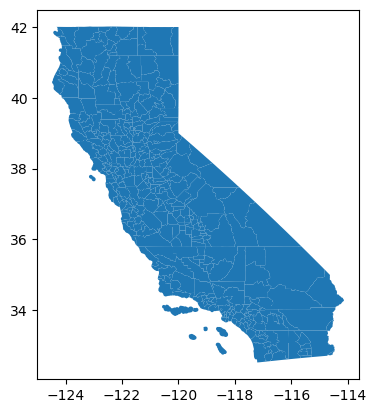

In [9]:
cali_shape.plot()

In [10]:
cali_shape.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
# Parts of coloring shapes:
# 1. fill - inside part
# 2. stroke/line/edge - outline around our shape

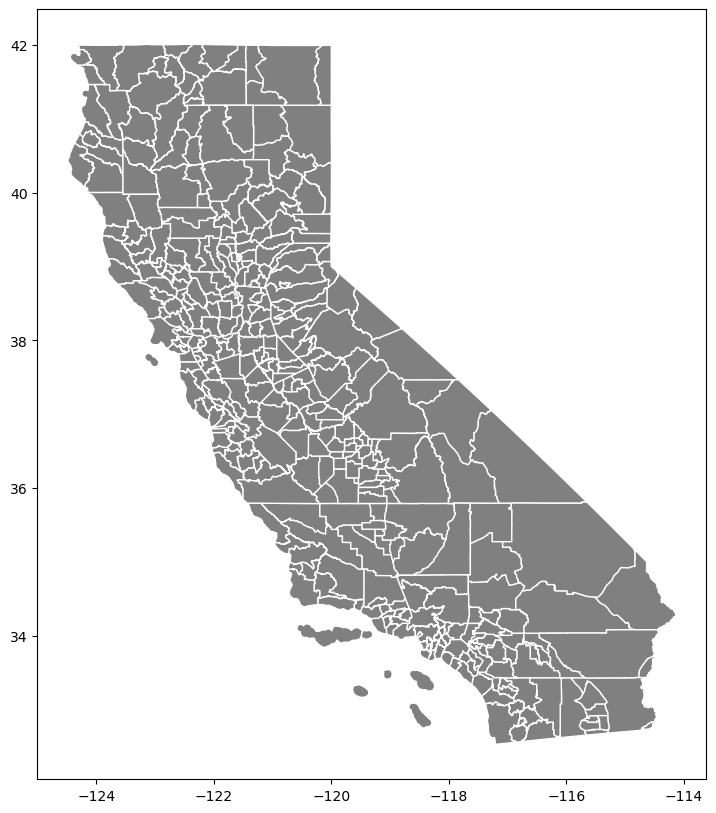

In [12]:
cali_shape.set_crs(epsg=4269)
cali_resize = cali_shape.plot(figsize = (10,10), color = 'grey', edgecolor = 'white')

## Creating the choropleth:

In [13]:
joined = gpd.sjoin(cali_shape, cali_bluebird_points, how = 'inner', predicate = 'contains')
joined

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,Time,Country,Country-State-County,State,County,Locality,Latitude,Longitude,eBird Checklist ID,eBird Species Code
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,1120,United States,US-CA-109,California,Tuolumne,Rock River Rd. (TUO Co.),37.825786,-120.539675,S127041032,wesblu
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,1110,United States,US-CA-109,California,Tuolumne,Rock River Rd. (TUO Co.),37.825786,-120.539675,S106524014,wesblu
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,1242,United States,US-CA-109,California,Tuolumne,Rock River Rd. pond,37.827300,-120.522310,S100897228,wesblu
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,1242,United States,US-CA-109,California,Tuolumne,Rock River Rd. pond,37.827300,-120.522310,S100897228,wesblu
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,1303,United States,US-CA-109,California,Tuolumne,Two Mile Bar Rec Area (TUO Co.),37.841100,-120.642000,S109037024,wesblu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,06,045,92510,01935256,0604592510,Point Arena,Point Arena CCD,22,Z5,G4040,...,1239,United States,US-CA-045,California,Mendocino,Point Arena- Lighthouse Rd. upper fields and c...,38.939092,-123.720818,S101103123,wesblu
394,06,045,92510,01935256,0604592510,Point Arena,Point Arena CCD,22,Z5,G4040,...,1239,United States,US-CA-045,California,Mendocino,Point Arena- Lighthouse Rd. upper fields and c...,38.939092,-123.720818,S101103123,wesblu
394,06,045,92510,01935256,0604592510,Point Arena,Point Arena CCD,22,Z5,G4040,...,1425,United States,US-CA-045,California,Mendocino,Point Arena Lighthouse- grounds and gate over...,38.954403,-123.740237,S104395772,wesblu
394,06,045,92510,01935256,0604592510,Point Arena,Point Arena CCD,22,Z5,G4040,...,1425,United States,US-CA-045,California,Mendocino,Point Arena Lighthouse- grounds and gate over...,38.954403,-123.740237,S104395772,wesblu


In [14]:
administrative_regions = cali_shape.set_index('NAME')[['geometry']]
administrative_regions

,geometry
NAME,
Sonora,"POLYGON ((-120.65327 37.83205, -120.65324 37.8..."
Twain Harte-Tuolumne City,"POLYGON ((-120.50044 38.00665, -120.50032 38.0..."
Escalon,"POLYGON ((-121.14725 37.90501, -121.14656 37.9..."
Lockeford,"POLYGON ((-121.21532 38.13784, -121.21074 38.1..."
Lodi,"POLYGON ((-121.41099 38.23198, -121.41092 38.2..."
...,...
Sonoma,"POLYGON ((-122.63053 38.38709, -122.63052 38.3..."
Fort Bragg,"POLYGON ((-123.88851 39.41942, -123.88785 39.4..."
Point Arena,"POLYGON ((-123.80986 38.96122, -123.80607 38.9..."


In [15]:
administrative_regions['count'] = joined['NAME'].value_counts()
administrative_regions

,geometry,count
NAME,,
Sonora,"POLYGON ((-120.65327 37.83205, -120.65324 37.8...",11.0
Twain Harte-Tuolumne City,"POLYGON ((-120.50044 38.00665, -120.50032 38.0...",NaN
Escalon,"POLYGON ((-121.14725 37.90501, -121.14656 37.9...",NaN
Lockeford,"POLYGON ((-121.21532 38.13784, -121.21074 38.1...",10.0
Lodi,"POLYGON ((-121.41099 38.23198, -121.41092 38.2...",38.0
...,...,...
Sonoma,"POLYGON ((-122.63053 38.38709, -122.63052 38.3...",25.0
Fort Bragg,"POLYGON ((-123.88851 39.41942, -123.88785 39.4...",1.0
Point Arena,"POLYGON ((-123.80986 38.96122, -123.80607 38.9...",4.0


<AxesSubplot:>

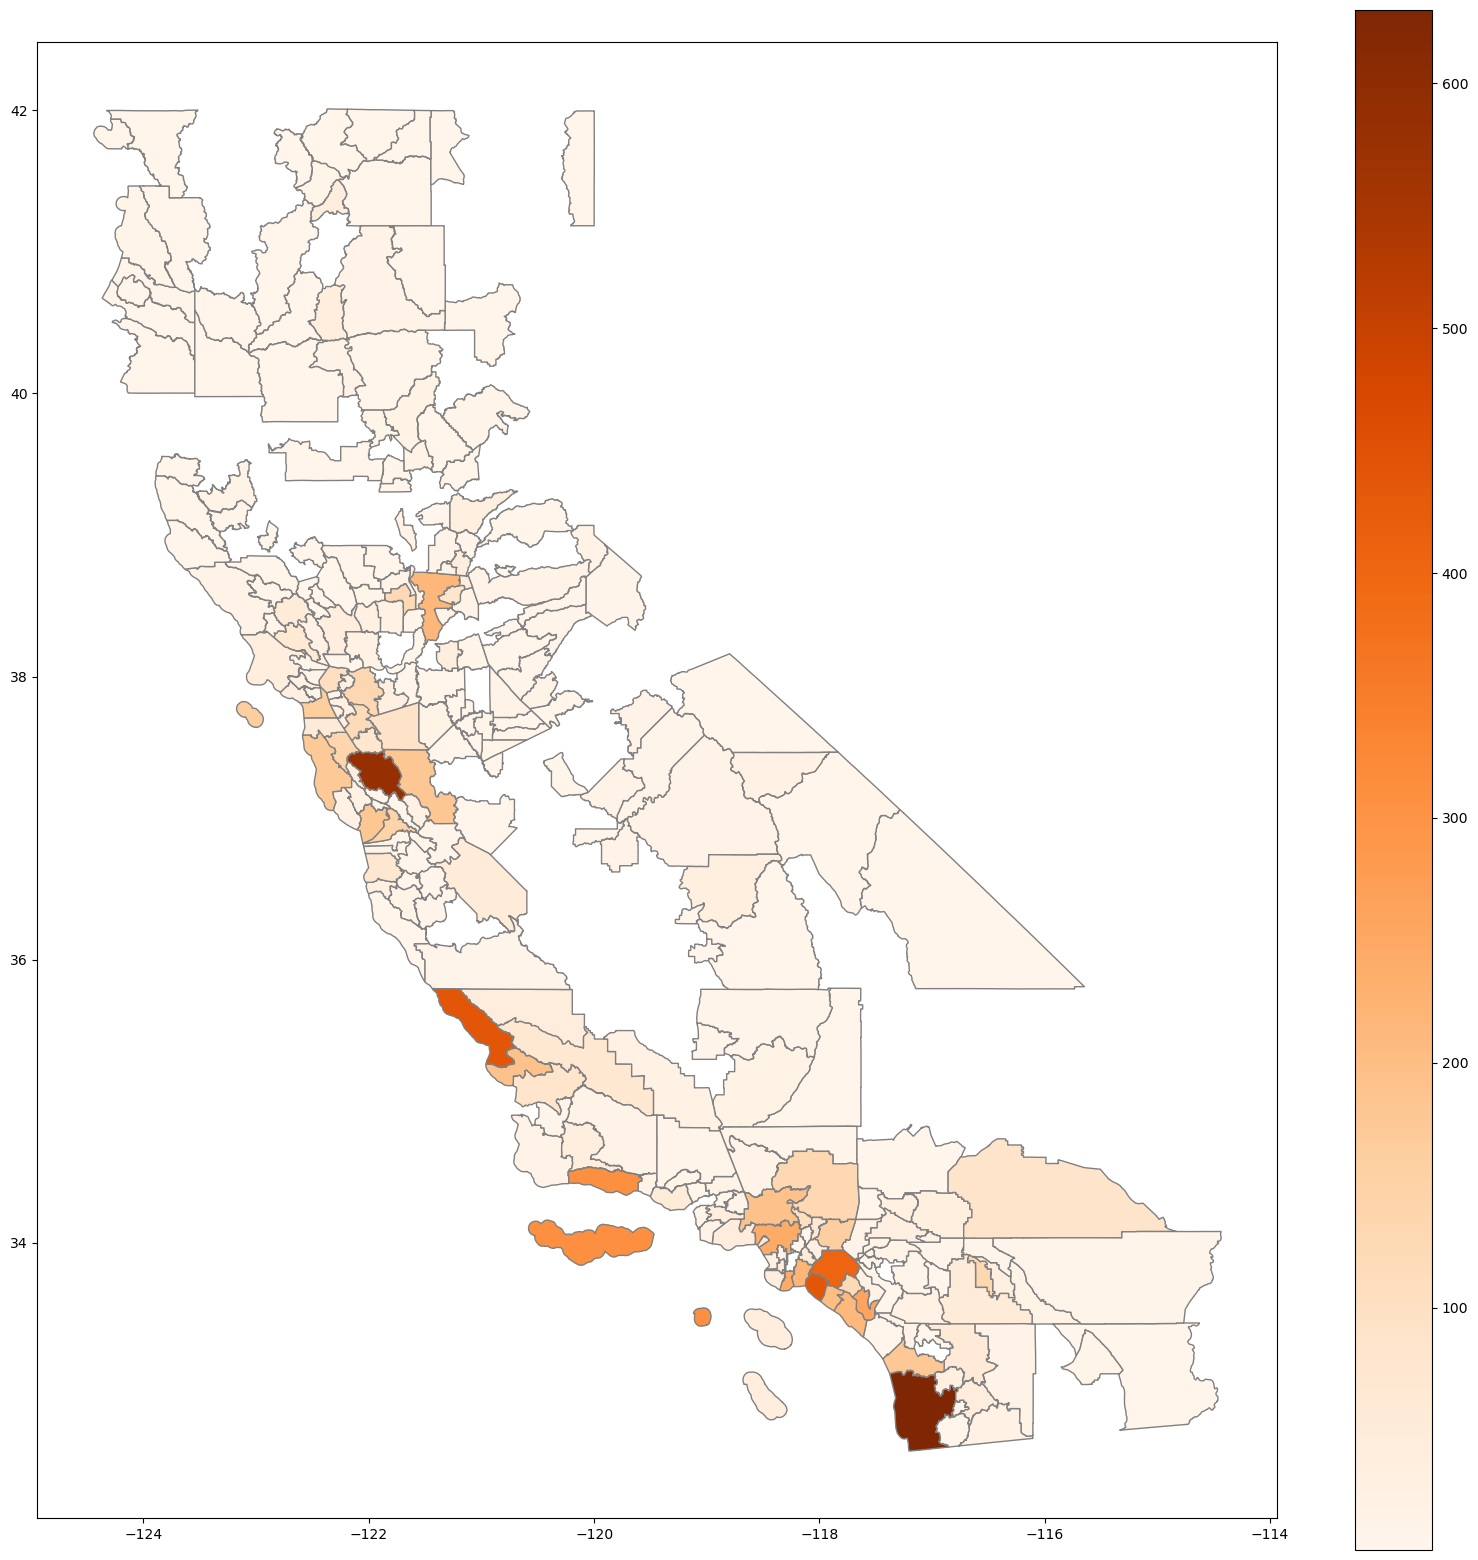

In [16]:
administrative_regions.plot(column = 'count', cmap = 'Oranges', legend = True, figsize = (20, 20), edgecolor = 'grey')

## Creating pie and bar charts:

In [17]:
counties = bluebirds.groupby('County').count()
counties

,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,Parent Species,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width
County,,,,,,,,,,,,,,,,,,,,,
Alameda,352,352,352,352,0,352,352,352,352,352,...,352,352,352,121,0,352,352,0,345,345
Alpine,8,8,8,8,0,8,8,8,8,8,...,8,8,8,1,0,8,8,0,8,8
Amador,8,8,8,8,0,8,8,8,8,8,...,8,8,8,0,0,8,8,0,8,8
Butte,42,42,42,42,1,42,42,42,42,42,...,42,42,42,15,0,42,42,0,42,42
Calaveras,18,18,18,18,0,18,18,18,18,18,...,18,18,18,5,0,18,18,0,18,18
Contra Costa,295,295,295,295,0,295,295,295,295,295,...,295,295,295,94,0,295,295,0,289,289
Del Norte,6,6,6,6,0,6,6,6,6,6,...,6,6,6,4,0,6,6,0,6,6
El Dorado,30,30,30,30,0,30,30,30,30,30,...,30,30,30,18,0,30,30,0,29,29
Fresno,30,30,30,30,0,30,30,30,30,30,...,30,30,30,15,0,30,30,0,30,30


In [18]:
socal_counties = ['San Luis Obispo', 'Kern', 'Santa Barbara',
                  'Ventura', 'Los Angeles', 'San Bernardino', 'Orange',
                  'Riverside', 'San Diego', 'Imperial']
socal = counties.loc[socal_counties]
socal

,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,Parent Species,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width
County,,,,,,,,,,,,,,,,,,,,,
San Luis Obispo,491,491,491,491,4,491,491,491,491,491,...,491,491,491,190,0,491,491,8,489,489
Kern,50,50,50,50,0,50,50,50,50,50,...,50,50,50,8,0,50,50,1,50,50
Santa Barbara,397,397,397,397,2,397,397,397,397,397,...,397,397,397,156,0,397,397,0,391,391
Ventura,159,159,159,159,1,159,159,159,159,159,...,159,159,159,74,0,159,159,10,159,159
Los Angeles,1474,1474,1474,1474,7,1474,1474,1474,1474,1474,...,1474,1474,1474,474,0,1473,1473,3,1453,1453
San Bernardino,214,214,214,214,1,214,214,214,214,214,...,214,214,214,60,0,214,214,0,205,205
Orange,1563,1563,1563,1563,7,1563,1563,1563,1563,1563,...,1563,1563,1563,539,0,1563,1563,27,1552,1552
Riverside,314,314,314,314,1,314,314,314,314,314,...,314,314,314,90,0,314,314,0,309,309
San Diego,1007,1007,1007,1007,6,1007,1007,1007,1007,1007,...,1007,1007,1007,300,0,1007,1007,10,994,994


<AxesSubplot:ylabel='Date'>

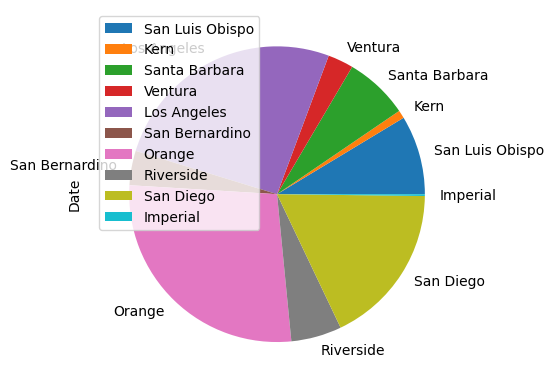

In [19]:
socal.plot.pie(y = 'Date')

<AxesSubplot:xlabel='County'>

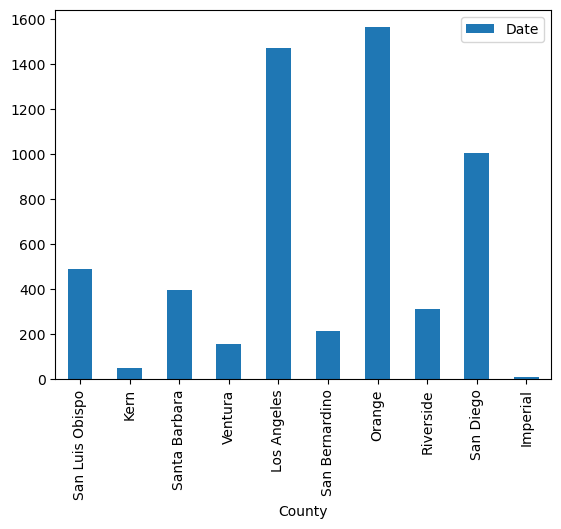

In [20]:
socal.plot.bar(y = 'Date')

## Conclusions and Future Insights:
### Conclusions:
* It seems that coastal regions have more sightings of bluebirds.
* Although unrelated to our study, Santa Clara weirdly seems to have a lot of sightings compared to the rest of Northern California.
* There most likely is a relationship between number of bird watchers and number of sightings. 
* More affluent regions seem to have more sightings.

### Further Insights:
* A multi-point geometric object with GeoPandas may be more useful than a choropleth. 
* The map needs to be adjusted to only socal for the purposes of this study, rather than all of California.
* Needs more than 10,000 rows to do better analysis (work in progress).